In [1]:
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
from qiskit_aer import AerSimulator

from vbe_arithmetic import ripple_add_modulo_n, create_circuit, set_reg_bits

In [2]:
# Conditions:
# 1. 0 <= a < N
# 2. 0 <= b < N
a_dec = 14 # [1, 1, 1, 0]
b_dec = 14 # [1, 1, 1, 0]
n_dec = 15 # [1, 1, 1, 1]

if a_dec >= n_dec or b_dec >= n_dec:
    raise ValueError("a >= N or b >= N")

# Number of bits in the binary numbers
# Get the bit length of N as it is expected to be greater than A nd B
bit_count = n_dec.bit_length()

qc, a, b, c, ca, cb = create_circuit(a_dec, b_dec, bit_count)

# Register for the modulo number
n = QuantumRegister(bit_count, 'N')
cN = ClassicalRegister(bit_count, 'cN')

# Temporary register to copy the value of reg1 based on the state of the overflow bit
t = QuantumRegister(bit_count, 't')

# Temporary qubit to store the overflow bit
overflow = QuantumRegister(1, 'of')

# Add the registers to the circuit
qc.add_register(n, cN, overflow, t)

# set the bits to the modulo register
set_reg_bits(qc, n_dec, n)

# Example
# 6 + 6 = 12 % 7 = 5

# A detailed example:
# bit_count = 3 <-- no. of bits in operands
# N = 7
# Decimal operation: a(6) + b(6) = 12
# a+b mod N = 12 mod 7 = 5
# Therefore, the result must be :
#   111        0101         110
#    ^           ^           ^
#    N      (a+b mod N)      a
#  (LTR)       (LTR)       (RTL)

ripple_add_modulo_n(qc, bit_count, a, b, c, n, overflow, t)

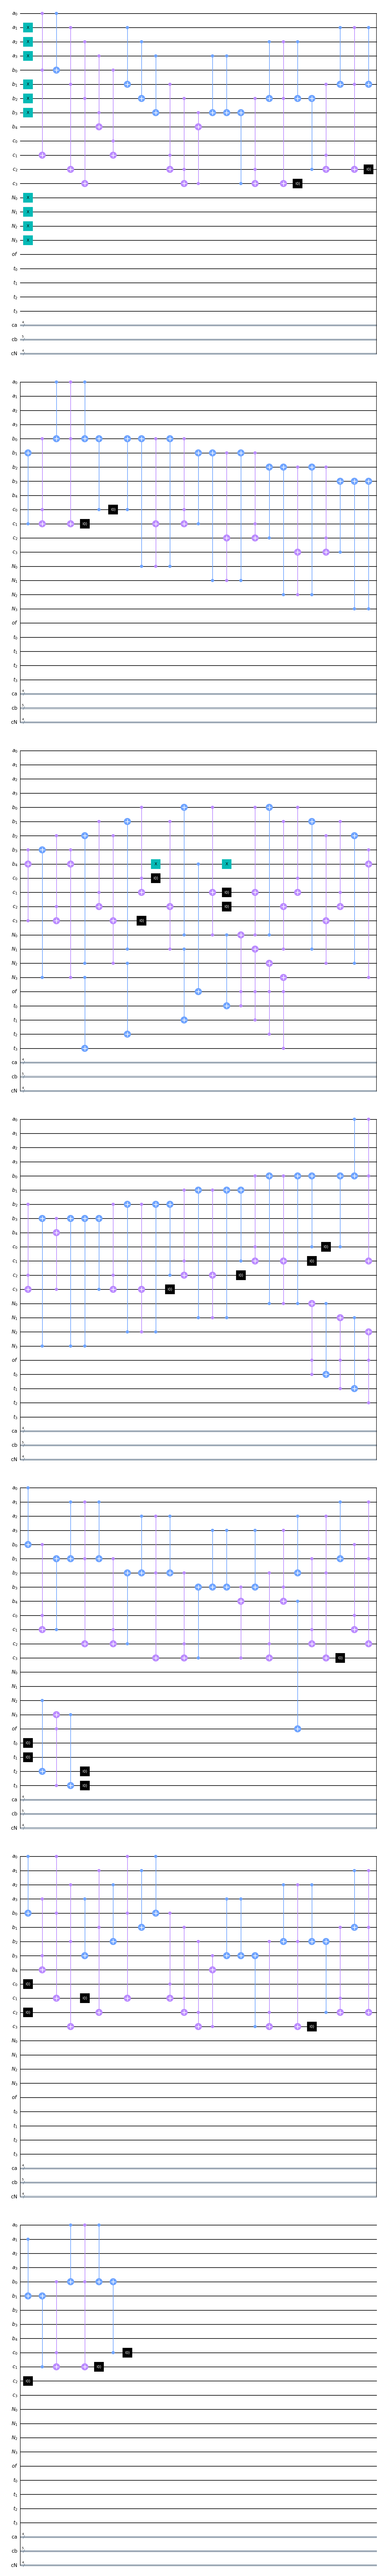

In [3]:
qc.draw(output="mpl", filename="circuits/1996_adder_module_N.png", style="clifford")

In [4]:
qc.measure(a, ca)
qc.measure(b, cb)
qc.measure(n, cN)

backend_sim = AerSimulator()
job_sim = backend_sim.run(qc, shots=1)
result_sim = job_sim.result()

res = result_sim.get_counts(qc)
print(res)

{'1111 01101 1110': 1}
